In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
columns=names=["gyroX","gyroY","gyroZ","accX","accY","accZ","result","date"]

In [80]:
# get data file names
filenames = glob.glob('files' + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)
    df=xl_file.parse('Sheet1',names=columns)
    dfs.concat(df, ignore_index=True)
print(df.count())

gyroX     4978
gyroY     4978
gyroZ     4978
accX      4978
accY      4978
accZ      4978
result    4978
date      4978
dtype: int64


In [81]:
df

,gyroX,gyroY,gyroZ,accX,accY,accZ,result,date
0,-0.293847,-0.706684,0.008376,1.003363,5.763914,10.815459,1,2024-02-04 17:22:05.305947
1,-0.094195,-0.021763,-0.295777,0.480351,5.809270,10.450817,1,2024-02-04 17:22:05.607008
2,-0.449503,-1.277685,0.316071,1.575025,7.403005,3.996240,1,2024-02-04 17:22:05.903925
3,-0.971629,0.435628,-0.566263,-1.189876,5.992788,8.162526,1,2024-02-04 17:22:06.207406
4,0.925458,-0.762510,0.198321,0.776136,6.596183,3.820954,1,2024-02-04 17:22:06.509202
...,...,...,...,...,...,...,...,...
4973,-0.266697,-0.009119,-0.109637,-1.355282,5.077741,8.330776,1,2024-01-23 15:34:02.873512
4974,-0.009817,0.052218,0.075189,-1.077160,5.395829,7.670349,1,2024-01-23 15:34:04.194544
4975,0.013670,-0.038907,-0.149404,-1.434467,4.949757,7.311396,1,2024-01-23 15:34:05.593981
4976,-0.248187,-0.020490,0.096957,-0.146096,6.096073,9.812096,1,2024-01-23 15:34:07.023030


In [82]:
df['result'].unique()

array([1, 2])

In [83]:
df['result']=df['result'].replace(['BAD', 'GOOD'],[1,2])

In [84]:
df

,gyroX,gyroY,gyroZ,accX,accY,accZ,result,date
0,-0.293847,-0.706684,0.008376,1.003363,5.763914,10.815459,1,2024-02-04 17:22:05.305947
1,-0.094195,-0.021763,-0.295777,0.480351,5.809270,10.450817,1,2024-02-04 17:22:05.607008
2,-0.449503,-1.277685,0.316071,1.575025,7.403005,3.996240,1,2024-02-04 17:22:05.903925
3,-0.971629,0.435628,-0.566263,-1.189876,5.992788,8.162526,1,2024-02-04 17:22:06.207406
4,0.925458,-0.762510,0.198321,0.776136,6.596183,3.820954,1,2024-02-04 17:22:06.509202
...,...,...,...,...,...,...,...,...
4973,-0.266697,-0.009119,-0.109637,-1.355282,5.077741,8.330776,1,2024-01-23 15:34:02.873512
4974,-0.009817,0.052218,0.075189,-1.077160,5.395829,7.670349,1,2024-01-23 15:34:04.194544
4975,0.013670,-0.038907,-0.149404,-1.434467,4.949757,7.311396,1,2024-01-23 15:34:05.593981
4976,-0.248187,-0.020490,0.096957,-0.146096,6.096073,9.812096,1,2024-01-23 15:34:07.023030


/Users/faridfakhnavar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/faridfakhnavar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/faridfakhnavar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/faridfakhnavar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

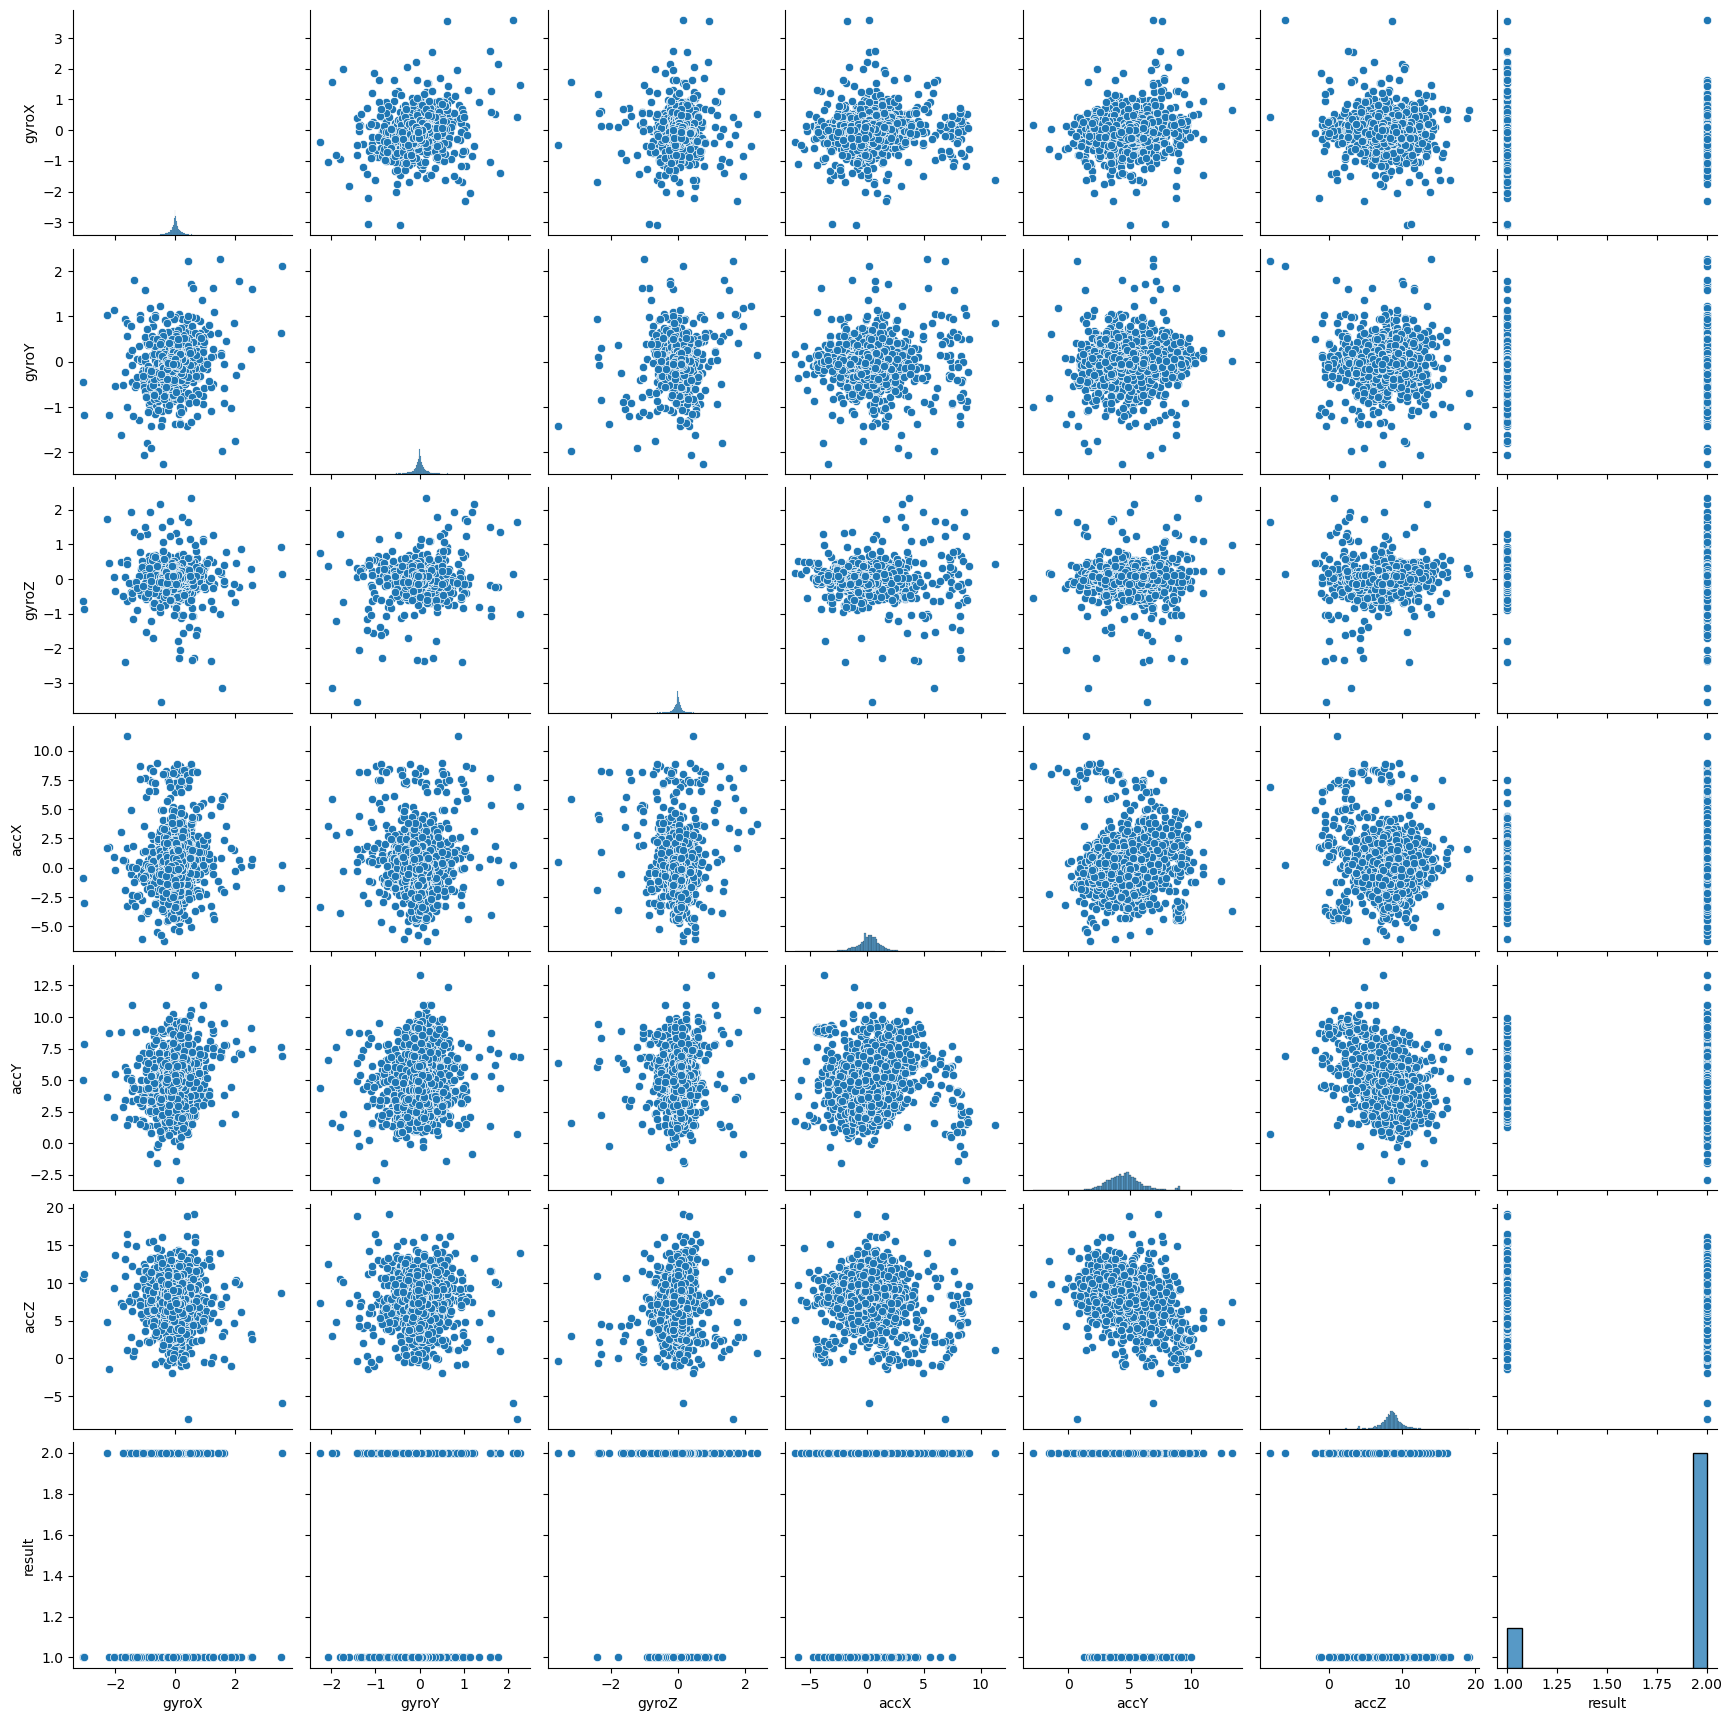

In [85]:
sns.pairplot(df)

In [86]:
x=df[['gyroX', 'gyroY', 'gyroZ','accX', 'accY', 'accZ']]
y=df['result']

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

DecisionTreeClassifier

In [88]:
ModelD=DecisionTreeClassifier()

In [89]:
ModelD.fit(x_train,y_train)
y_predict=ModelD.predict(x_test)

In [90]:
ModelD.score(x_test,y_test)

0.8122489959839357

In [91]:
confusion_matrix(y_test,y_predict)

array([[ 72,  90],
       [ 97, 737]])

KNeighborsClassifier

In [92]:
k=0
M=-1
for i in range (1,101):
    ModelK=KNeighborsClassifier(n_neighbors=i)
    ModelK.fit(x_train,y_train)
    S=ModelK.score(x_test,y_test)
    if S>M:
        M=S
        k=i
print(k)

60


In [93]:
ModelK=KNeighborsClassifier(n_neighbors=k)

In [94]:
ModelK.fit(x_train,y_train)
y_predict=ModelK.predict(x_test)

In [95]:
ModelK.score(x_test,y_test) 

0.8423694779116466

In [96]:
confusion_matrix(y_test,y_predict)

array([[  7, 155],
       [  2, 832]])

RandomForestClassifier

In [97]:
ModelR=RandomForestClassifier()
ModelR.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
ModelR.score(x_test,y_test)

0.8353413654618473